# 1. Import Libraries & Data

In [1]:
# Imports libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
# Imports customer data file
path = r'/Users/oliviamurphy/Desktop/2022-01 Insta Cart Analysis'
orders_products_departments_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_departments_final_agg.pkl'))

# 2. Security Implications
## The user_id variable can be linked back to a first & last name, which is PII. 

In [3]:
# checks first five rows of customer_df
orders_products_departments_final.head(1)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,price_range_loc,busiest day,busiest_days,busiest_period_of_day,max_orders,loyalty_flag,average_spend,spender_type,median_days_since_prior_order,Frequent_customer?
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Mid range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer


# 3a. Regional Division

## Region 1 (Northeast): Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, Connecticut, New York, Pennsylvania, New Jersey

## Region 2 (Midwest): Wisconsin, Michigan, Illinois, Indiana, Ohio, North Dakota, South Dakota, Nebraska, Kansas, Minnesota, Iowa, Missouri

## Region 3 (South): Delaware, Maryland, District of Columbia, Virginia, West Virginia, North Carolina, South Carolina, Georgia, Florida, Kentucky, Tennessee, Mississippi, Alabama, Oklahoma, Texas, Arkansas, Louisiana

## Region 4 (West): Idaho, Montana, Wyoming, Nevada, Utah, Colorado, Arizona, New Mexico, Alaska, Washington, Oregon, California, Hawaii

### Source: https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States

In [4]:
# defines regions by states
region_list = []
for value in orders_products_departments_final['state']:
    if ((value == 'Maine') or (value == 'New Hampshire') or (value == 'Vermont') or (value == 'Massachusetts') or (value == 'Rhode Island') or (value == 'Connecticut') or (value == 'New York') or (value == 'Pennsylvania') or (value == 'New Jersey') ) :
        region_list.append('Region 1 (Northeast)')
    elif ((value == 'Wisconsin') or (value == 'Michigan') or (value == 'Illinois') or (value == 'Indiana') or (value == 'Ohio') or (value == 'North Dakota') or (value == 'South Dakota') or (value == 'Nebraska') or (value == 'Kansas') or (value == 'Minnesota') or (value == 'Iowa') or (value == 'Missouri')):
        region_list.append('Region 2 (Midwest)')
    elif ((value == 'Delaware') or (value == 'Maryland') or (value == 'District of Columbia') or (value == 'Virginia') or (value == 'West Virginia') or (value == 'North Carolina') or (value == 'South Carolina') or (value == 'Georgia') or (value == 'Florida') or (value == 'Kentucky') or (value == 'Tennessee') or (value == 'Mississippi') or (value == 'Alabama') or (value == 'Oklahoma') or (value == 'Texas') or (value == 'Arkansas') or (value == 'Louisiana')):
        region_list.append('Region 3 (South)')
    elif ((value =='Idaho') or (value == 'Montana') or (value == 'Wyoming') or (value == 'Nevada') or (value == 'Utah') or (value == 'Colorado') or (value == 'Arizona') or (value == 'New Mexico') or (value == 'Alaska') or (value == 'Washington') or (value == 'Oregon') or (value == 'California') or (value == 'Hawaii')):
        region_list.append('Region 4 (West)')
    else:
        region_list.append('Unknown Region')

In [5]:
# saves region_list to region column in df
orders_products_departments_final['region'] = region_list

In [6]:
# checks first 5 rows of region column
orders_products_departments_final['region'].head()

0    Region 2 (Midwest)
1    Region 2 (Midwest)
2    Region 2 (Midwest)
3    Region 2 (Midwest)
4    Region 2 (Midwest)
Name: region, dtype: object

## Ordering Habits Based on Region

# 3b Spending Habits 
## Each region has very similar spending habits. Out of the four regions, Region 2 (Midwest) has the highest percentage of high spenders, while region 1 has the lowest percentage of high spenders.

In [7]:
# creates crosstab for region by loyalty_flag
region_spending_crosstab = pd.crosstab(orders_products_departments_final['region'], orders_products_departments_final['spender_type'], dropna = False)

In [8]:
# creates a list for the total spenders in each region
spender_count_list = []
for regions in region_spending_crosstab:
    spender_count_list = region_spending_crosstab['High spender'] + region_spending_crosstab['Low spender']

In [9]:
# adds a column for the total customers in each region
region_spending_crosstab['Total customers'] = spender_count_list

In [10]:
# creates a list for the percentage of high spenders  in each region
high_spender_percentage_list = []
for high_spenders in region_spending_crosstab:
    high_spender_percentage_list = (region_spending_crosstab['High spender']/region_spending_crosstab['Total customers'])*100 

In [11]:
# adds a column for the percentage of customers that are high spenders in each region
region_spending_crosstab['High spenders percentage'] = high_spender_percentage_list

In [12]:
# creates a list for the percentage of low spenders  in each region
low_spender_percentage_list = []
for low_spenders in region_spending_crosstab:
    low_spender_percentage_list = (region_spending_crosstab['Low spender']/region_spending_crosstab['Total customers'])*100

In [13]:
# adds a column for the percentage of customers that are low spenders in each region
region_spending_crosstab['Low spenders percentage'] = low_spender_percentage_list

In [14]:
# prints crosstab
region_spending_crosstab

spender_type,High spender,Low spender,Total customers,High spenders percentage,Low spenders percentage
region,,,,,
Region 1 (Northeast),18131,5619802,5637933,0.321589,99.678411
Region 2 (Midwest),29335,7447432,7476767,0.392349,99.607651
Region 3 (South),40959,10591015,10631974,0.385244,99.614756
Region 4 (West),31537,8139372,8170909,0.385967,99.614033


In [15]:
# drops un-needed columns from region_spending_crosstab
region_spending_crosstab = region_spending_crosstab.drop(columns = {'High spender', 'Low spender', 'Total customers'})

In [16]:
# returns region_spending_crosstab
region_spending_crosstab

spender_type,High spenders percentage,Low spenders percentage
region,,
Region 1 (Northeast),0.321589,99.678411
Region 2 (Midwest),0.392349,99.607651
Region 3 (South),0.385244,99.614756
Region 4 (West),0.385967,99.614033


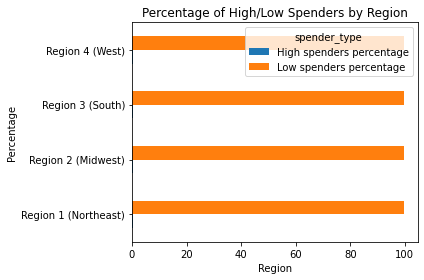

In [17]:
# creates bar chart for region_spending_crosstab
region_spending_crosstab_chart = region_spending_crosstab.plot.barh()
plt.title('Percentage of High/Low Spenders by Region')
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.tight_layout()

In [18]:
# saves bar chart for Profile distribution
region_spending_crosstab_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations' 'region_spending_crosstab_chart.png'))

In [19]:
# saves region_spending_crosstab
region_spending_crosstab.to_csv(os.path.join(path,  '04 Analysis', 'region_spending_crosstab.csv'))

In [20]:
# subsets frame with region 1
region1 =orders_products_departments_final[orders_products_departments_final['region']=='Region 1 (Northeast)']

In [21]:
# checks shapy of region1
region1.shape

(5728144, 33)

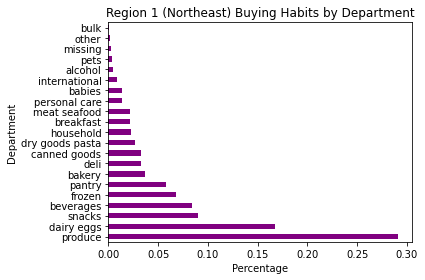

In [22]:
# creates normalized bar chart of region 1
region1 = (region1['department'].value_counts()/5728144).plot.barh(color = 'purple')
plt.title('Region 1 (Northeast) Buying Habits by Department')
plt.xlabel('Percentage')
plt.ylabel('Department')
plt.tight_layout()

In [23]:
#save region1 png
region1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','region1dep.png'))

In [24]:
# subsets frame with region 2
region2 =orders_products_departments_final[orders_products_departments_final['region']=='Region 2 (Midwest)']

In [25]:
# checks shape of region2
region2.shape

(7603550, 33)

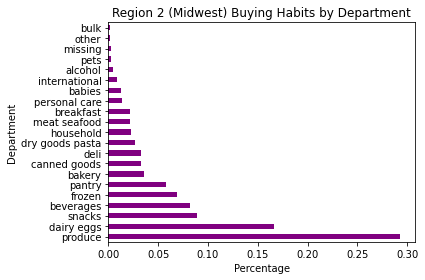

In [26]:
# creates normalized bar chart of region 2
region2 = (region2['department'].value_counts()/7603550).plot.barh(color = 'purple')
plt.title('Region 2 (Midwest) Buying Habits by Department')
plt.xlabel('Percentage')
plt.ylabel('Department')
plt.tight_layout()

In [27]:
#save region2 png
region2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','region2dep.png'))

In [28]:
# subsets frame with region 3
region3 =orders_products_departments_final[orders_products_departments_final['region']=='Region 3 (South)']

In [29]:
# checks shape of region3
region3.shape

(10801195, 33)

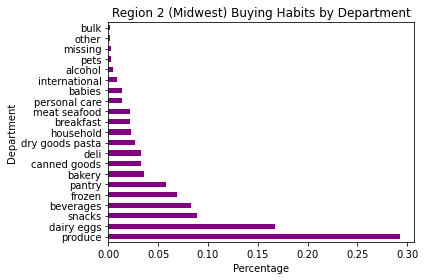

In [30]:
# creates normalized bar chart of region 3
region3 = (region3['department'].value_counts()/10801195).plot.barh(color = 'purple')
plt.title('Region 2 (Midwest) Buying Habits by Department')
plt.xlabel('Percentage')
plt.ylabel('Department')
plt.tight_layout()

In [31]:
#save region3 png
region3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','region3dep.png'))

In [32]:
# subsets frame with region 4
region4 =orders_products_departments_final[orders_products_departments_final['region']=='Region 4 (West)']

In [33]:
# checks shape of region4
region4.shape

(8300141, 33)

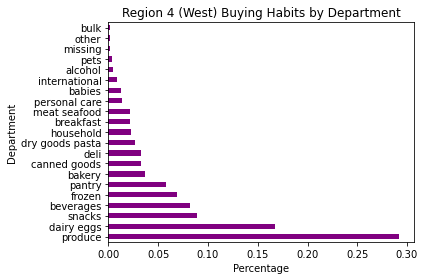

In [34]:
# creates normalized bar chart of region 4
region4 = (region4['department'].value_counts()/8300141).plot.barh(color = 'purple')
plt.title('Region 4 (West) Buying Habits by Department')
plt.xlabel('Percentage')
plt.ylabel('Department')
plt.tight_layout()

In [35]:
#save region4 png
region4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','region4dep.png'))

In [36]:
# returns mean of days_passed_since_last_order
orders_products_departments_final.groupby('region')['days_passed_since_last_order'].mean()

region
Region 1 (Northeast)    11.075993
Region 2 (Midwest)      11.181978
Region 3 (South)        11.108232
Region 4 (West)         11.046991
Name: days_passed_since_last_order, dtype: float64

# 4 Exclude customers with low activity
## low activity is defined as customers with less than 5 orders

In [37]:
# creates list for the the activity flag
activity_flag_list = []
for order_count in orders_products_departments_final['max_orders']:
    if order_count < 5:
        activity_flag_list.append('low activity')
    elif order_count >=5:
        activity_flag_list.append('normal/high activity')
    else:
        activity_flag_list.append('error')

In [38]:
# adds a column for the activity flag
orders_products_departments_final['activity_flag'] = activity_flag_list

In [39]:
# creates df that filters out customers with low activity
normal_high_activity_cust_df = orders_products_departments_final[orders_products_departments_final['activity_flag']== 'normal/high activity']

In [40]:
# checks first five rows of normal_high_activity_cust_df
normal_high_activity_cust_df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,busiest_days,busiest_period_of_day,max_orders,loyalty_flag,average_spend,spender_type,median_days_since_prior_order,Frequent_customer?,region,activity_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Region 2 (Midwest),normal/high activity
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Region 2 (Midwest),normal/high activity
2,4913,Table Water Crackers,78,19,4.4,894221,138,23,5,13,...,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Region 2 (Midwest),normal/high activity
3,11759,Organic Simply Naked Pita Chips,107,19,4.4,1986630,138,7,0,12,...,Busiest day,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Region 2 (Midwest),normal/high activity
4,13424,Almonds,45,19,4.2,3139998,138,28,6,11,...,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Region 2 (Midwest),normal/high activity


In [41]:
# checks shape of normal_high_activity_cust_df
normal_high_activity_cust_df.shape

(30991542, 34)

# 5. Customer Profiling
## Creating a variable for Profile based on gender & income
### income range based on https://www.investopedia.com/financial-edge/0912/which-income-class-are-you.aspx
#### Profiles: Low Income Male, Low Income Female, Middle Income Male, Middle Income Female, High Income Male, High Income Female

In [42]:
#defines 'Low Income Male' profile
orders_products_departments_final.loc[(orders_products_departments_final['gender']=='Male') & (orders_products_departments_final['income']<42000), 'profile'] = 'Low Income Male'

In [43]:
#defines 'Low Income Female' profile
orders_products_departments_final.loc[(orders_products_departments_final['gender'] == 'Female') & (orders_products_departments_final['income']<42000), 'profile'] = 'Low Income Female'

In [44]:
#defines 'High Income Male' profile
orders_products_departments_final.loc[(orders_products_departments_final['gender']=='Male') & (orders_products_departments_final['income']>126000), 'profile'] = 'High Income Male'

In [45]:
#defines 'High Income Female' profile
orders_products_departments_final.loc[(orders_products_departments_final['gender']=='Female') & (orders_products_departments_final['income']>126000), 'profile'] = 'High Income Female'

In [46]:
#defines 'Middle Income Male' profile
orders_products_departments_final.loc[(orders_products_departments_final['gender']=='Male') & ((orders_products_departments_final['income']>=42000) & (orders_products_departments_final['income']<=126000)), 'profile'] = 'Middle Income Male'

In [47]:
#defines 'Middle Income Female ' profile
orders_products_departments_final.loc[(orders_products_departments_final['gender']=='Female') & ((orders_products_departments_final['income']>=42000) & (orders_products_departments_final['income']<=126000)), 'profile'] = 'Middle Income Female'

In [48]:
# outputs value counts for 'Profile'
orders_products_departments_final['profile'].value_counts()

Middle Income Male      11074756
Middle Income Female    10836495
High Income Female       4246734
High Income Male         4212412
Low Income Male          1041901
Low Income Female        1020732
Name: profile, dtype: int64

# 6. Visualization for the distribution of Profiles

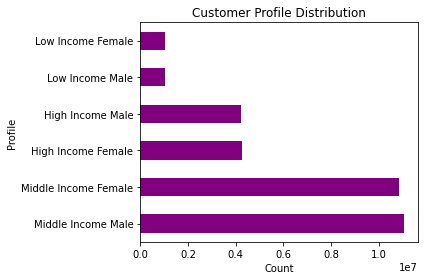

In [49]:
#creates bar graph for the distribution of the Profile variable
profile_distribution_bar = orders_products_departments_final['profile'].value_counts().plot.barh(color = 'purple')
plt.title('Customer Profile Distribution')
plt.xlabel('Count')
plt.ylabel('Profile')
plt.tight_layout()

In [50]:
# creates path to 04 Analysis folder
path2 = r'/Users/oliviamurphy/Desktop/2022-01 Insta Cart Analysis/04 Analysis/Visualizations'

In [51]:
# saves bar chart for Profile distribution
profile_distribution_bar.figure.savefig(os.path.join(path2, 'profile_distribution_bar.png'))

# 7. Customer-profile level aggregates for usage frequency and expenditure.

In [52]:
# creates short version of customer_df with only needed info
final_short = orders_products_departments_final[['user_id', 'profile', 'prices', 'order_number', 'region', 'department']]

In [53]:
# checks first five rows of customer_dep_short
final_short.head()

,user_id,profile,prices,order_number,region,department
0,138,Middle Income Male,5.8,28,Region 2 (Midwest),snacks
1,138,Middle Income Male,5.8,30,Region 2 (Midwest),snacks
2,138,Middle Income Male,4.4,23,Region 2 (Midwest),snacks
3,138,Middle Income Male,4.4,7,Region 2 (Midwest),snacks
4,138,Middle Income Male,4.2,28,Region 2 (Midwest),snacks


In [ ]:
# creates column for total visits
final_short_grouped= final_short.groupby(['user_id', 'profile']).agg({'prices': ['sum'],'order_number': ['max']})

In [ ]:
# renames 'prices' to 'total_spend' and 'order_number'to 'number_of_visits'
final_short_grouped =final_short_grouped.rename(columns = {'prices': 'total_spend', 'order_number': 'number_of_visits' })

In [ ]:
# creates copy of customer_dep_short_grouped['total_spend'] to use to create new columns
final_short_grouped['total_spend_2'] = final_short_grouped['total_spend']

In [ ]:
# creates copy of customer_dep_short_grouped['number_of_visits_2'] to use to create new columns
final_short_grouped['number_of_visits_2'] = final_short_grouped['number_of_visits']

In [ ]:
#changes dtype of number_of_visits_2 to float
final_short_grouped['number_of_visits_2'] = final_short_grouped['number_of_visits_2'].astype(np.float64)

In [ ]:
# creates column for average spend
final_short_grouped['average_spend'] = final_short_grouped['total_spend_2'] /final_short_grouped['number_of_visits_2']

In [ ]:
# drops aggregated version of columns, as they are no longer needed
final_short_grouped_frequency = final_short_grouped.drop(columns = ['total_spend', 'total_spend_2', 'average_spend', 'number_of_visits'])

## Customer-profile level aggregates for usage frequency
### On average, low income males & females are visiting the grocery store less than their middle & high income counterparts. There is very little difference in usage frequency between high income & middle income males and females.

In [168]:
# outputs the min, mean, and max number of visits by Profile
final_short_grouped_frequency.groupby('profile').agg(['min', 'mean', 'max'])

number_of_visits_2                 
                                                        
                                    min       mean   max
profile                                                 
High Income Female                  3.0  16.333374  99.0
High Income Male                    3.0  15.959593  99.0
Low Income Female                   3.0  13.226021  99.0
Low Income Male                     3.0  13.207359  99.0
Middle Income Female                3.0  15.698973  99.0
Middle Income Male                  3.0  15.789727  99.0

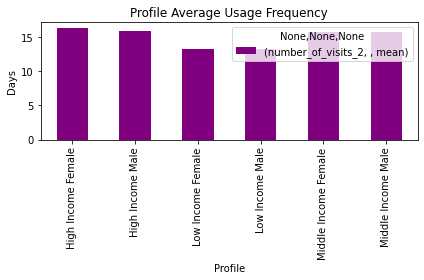

In [222]:
# creates chart of Profile value counts
final_short_grouped_frequency_bar = final_short_grouped_frequency.groupby('profile').agg(['mean']).plot.bar( color = 'purple')
plt.title('Profile Average Usage Frequency')
plt.xlabel('Profile')
plt.ylabel('Days')
plt.tight_layout()

## Customer-profile level aggregates for expenditure
### On average, high income males & females are spending much more than middle income males and females. Low income males & females are spending much less than their middle & high income counter parts, on average.

In [174]:
# drops aggregated version of columns
final_short_grouped_expenditure = final_short_grouped.drop(columns = ['total_spend', 'total_spend_2', 'number_of_visits_2', 'number_of_visits'])

/Users/oliviamurphy/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [175]:
# Expenditure descriptive statistics for customer profile
final_short_grouped_expenditure.groupby('profile').agg(['min', 'mean', 'max'])

average_spend                       
                                                         
                               min       mean         max
profile                                                  
High Income Female        7.066667  84.491085  392.040000
High Income Male          5.307143  84.672808  490.500000
Low Income Female         1.000000  48.210185  333.922000
Low Income Male           1.000000  48.088392  379.989062
Middle Income Female      1.100000  79.631701  450.266667
Middle Income Male        1.000000  79.419977  548.725000

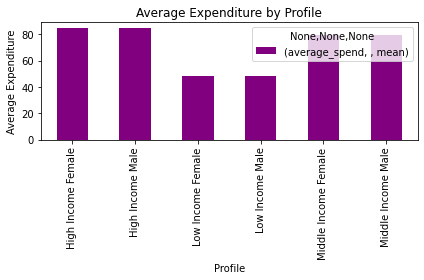

In [176]:
# creates chart of the average expenditure per trip by Profile
final_short_grouped_expenditure_bar = final_short_grouped_expenditure.groupby('profile').agg(['mean']).plot.bar(color = 'purple')
plt.title('Average Expenditure by Profile')
plt.xlabel('Profile')
plt.ylabel('Average Expenditure')
plt.tight_layout()

# 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.
## Spending patterns between profiles are very similar across regions, but not departments. 

In [177]:
# checks first five rows of final_short
final_short.head()

,user_id,profile,prices,order_number,region,department
0,138,Middle Income Male,5.8,28,Region 2 (Midwest),snacks
1,138,Middle Income Male,5.8,30,Region 2 (Midwest),snacks
2,138,Middle Income Male,4.4,23,Region 2 (Midwest),snacks
3,138,Middle Income Male,4.4,7,Region 2 (Midwest),snacks
4,138,Middle Income Male,4.2,28,Region 2 (Midwest),snacks


In [178]:
# creates column for total visits
final_short_grouped_region= final_short.groupby(['user_id', 'profile', 'region']).agg({'prices': ['sum'],'order_number': ['max']})

In [179]:
# renames 'prices' to 'total_spend' and 'order_number' to 'number_of_visits' 
final_short_grouped_region =final_short_grouped_region.rename(columns = {'prices': 'total_spend', 'order_number': 'number_of_visits' })

In [180]:
# creates copy of customer_dep_short_grouped['total_spend'] to use to create new columns
final_short_grouped_region['total_spend_2'] = final_short_grouped_region['total_spend']

In [181]:
# creates copy of customer_dep_short_grouped['number_of_visits_2'] to use to create new columns
final_short_grouped_region['number_of_visits_2'] = final_short_grouped_region['number_of_visits']

In [182]:
# creates column for average spend
final_short_grouped_region['average_spend'] = final_short_grouped_region['total_spend_2'] /final_short_grouped_region['number_of_visits_2']

In [183]:
# drops aggregated version of columns
final_short_grouped_region = final_short_grouped_region.drop(columns = ['total_spend', 'total_spend_2', 'number_of_visits_2', 'number_of_visits'])

/Users/oliviamurphy/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [184]:
# groups descriptive stats of Profiles by region
final_short_grouped_region.groupby(['region', 'profile']).agg(['min', 'mean', 'max'])

average_spend                       
                                                                              
                                                    min       mean         max
region               profile                                                  
Region 1 (Northeast) High Income Female        9.000000  84.431614  381.778571
                     High Income Male          7.200000  85.131189  490.500000
                     Low Income Female         1.100000  47.536795  273.950000
                     Low Income Male           1.100000  48.844033  349.683333
                     Middle Income Female      1.300000  79.386908  401.266667
                     Middle Income Male        1.100000  79.007514  449.200000
Region 2 (Midwest)   High Income Female        7.066667  84.747972  368.754545
                     High Income Male          7.800000  84.614189  442.966667
                     Low Income Female         1.100000  48.202042  298.046154
                     Low Income Male           2.100000  47.746120  255.000000
                     Middle Income Female      1.300000  79.872746  415.666667
                     Middle Income Male        1.000000  79.910490  373.541667
Region 3 (South)     High Income Female        7.200000  84.453457  373.533333
                     High Income Male          7.366667  84.307060  439.566667
                     Low Income Female         1.100000  48.343939  298.150000
                     Low Income Male           1.000000  48.190390  379.989062
                     Middle Income Female      1.100000  79.665793  450.266667
                     Middle Income Male        1.360000  79.385767  548.725000
Region 4 (West)      High Income Female        7.400000  84.347967  392.040000
                     High Income Male          5.307143  84.870315  402.666667
                     Low Income Female         1.000000  48.506106  333.922000
                     Low Income Male           1.000000  47.749759  315.500000
                     Middle Income Female      1.300000  79.527820  428.300000
                     Middle Income Male        1.400000  79.311154  399.992000

/var/folders/49/d7yrc74937g7tg22978g2xp80000gn/T/ipykernel_35399/2187105701.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


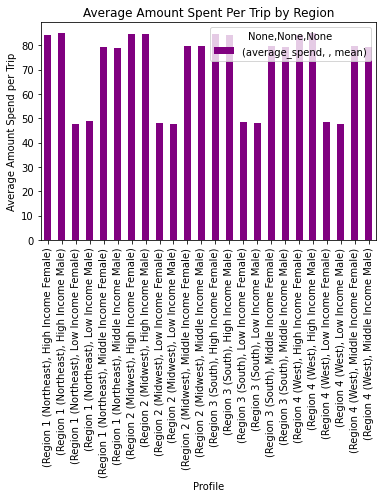

In [185]:
# creates bar chart for the average amount spent per trip by each profile by region
final_short_grouped_region_bar = final_short_grouped_region.groupby(['region', 'profile']).agg(['mean']).plot.bar(color = 'Purple')
plt.title('Average Amount Spent Per Trip by Region')
plt.xlabel('Profile')
plt.ylabel('Average Amount Spend per Trip')
plt.tight_layout()

In [ ]:
final_short_grouped_region_bar

## Department spending by profile investigation

In [186]:
# creates subset for the Low Income Males spending by Dept
customer_dep_short_male_low = final_short[final_short['profile']=='Low Income Male']

In [187]:
# renames 'prices' to 'total_spend'
customer_dep_short_male_low =customer_dep_short_male_low.rename(columns = {'prices': 'total_spend'})

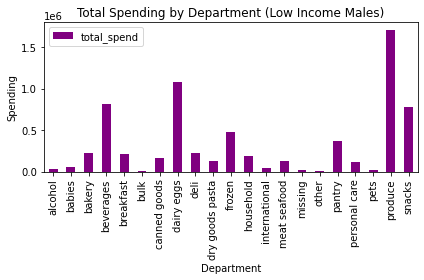

In [188]:
# plot for Low Income Males spending by Dept
customer_dep_short_male_low_bar = customer_dep_short_male_low.groupby(['department']).agg({'total_spend': 'sum'}).plot.bar(color = 'purple')
plt.title('Total Spending by Department (Low Income Males)')
plt.xlabel('Department')
plt.ylabel('Spending')
plt.tight_layout()

In [189]:
# creates subset for the Low Income Females spending by Dept
customer_dep_short_female_low = final_short[final_short['profile']=='Low Income Female']

In [190]:
# renames 'prices' to 'total_spend'
customer_dep_short_female_low =customer_dep_short_female_low.rename(columns = {'prices': 'total_spend'})

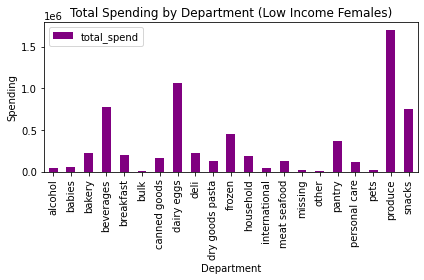

In [191]:
# plot for Low Income Females spending by Dept
customer_dep_short_female_low_bar = customer_dep_short_female_low.groupby(['department']).agg({'total_spend': 'sum'}).plot.bar(color = 'purple')
plt.title('Total Spending by Department (Low Income Females)')
plt.xlabel('Department')
plt.ylabel('Spending')
plt.tight_layout()

In [192]:
# creates subset for the Middle Income Males spending by Dept
customer_dep_middle_male = final_short[final_short['profile']=='Middle Income Male']

In [193]:
# renames 'prices' to 'total_spend'
customer_dep_middle_male =customer_dep_middle_male.rename(columns = {'prices': 'total_spend'})

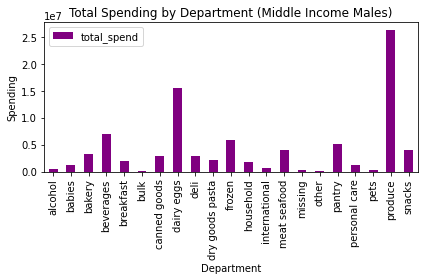

In [194]:
# plot for Middle Income Males spending by Dept
customer_dep_middle_male_bar = customer_dep_middle_male.groupby(['department']).agg({'total_spend': 'sum'}).plot.bar(color = 'purple')
plt.title('Total Spending by Department (Middle Income Males)')
plt.xlabel('Department')
plt.ylabel('Spending')
plt.tight_layout()

In [195]:
# creates subset for the Middle Income Females spending by Dept
customer_dep_middle_female = final_short[final_short['profile']=='Middle Income Female']

In [196]:
# renames 'prices' to 'total_spend'
customer_dep_middle_female =customer_dep_middle_female.rename(columns = {'prices': 'total_spend'})

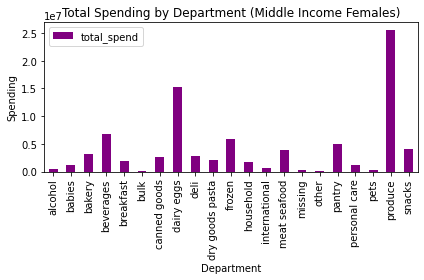

In [197]:
# plot for Middle Income Females spending by Dept
customer_dep_middle_female_bar = customer_dep_middle_female.groupby(['department']).agg({'total_spend': 'sum'}).plot.bar( color = 'purple')
plt.title('Total Spending by Department (Middle Income Females)')
plt.xlabel('Department')
plt.ylabel('Spending')
plt.tight_layout()

In [198]:
# creates subset for the High Income Males spending by Dept
customer_dep_male_high = final_short[final_short['profile']=='High Income Male']

In [199]:
# renames 'prices' to 'total_spend'
customer_dep_male_high =customer_dep_male_high.rename(columns = {'prices': 'total_spend'})

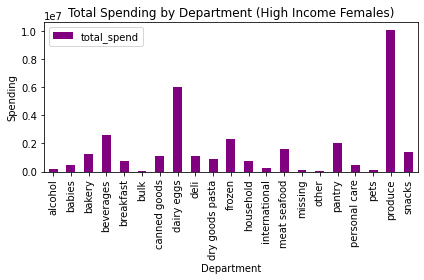

In [203]:
# plot for High Income Males spending by Dept
customer_dep_male_high_bar = customer_dep_male_high.groupby(['department']).agg({'total_spend': 'sum'}).plot.bar( color = 'purple')
plt.title('Total Spending by Department (High Income Females)')
plt.xlabel('Department')
plt.ylabel('Spending')
plt.tight_layout()

In [204]:
# creates subset for the High Income Females spending by Dept
customer_dep_female_high = final_short[final_short['profile']=='High Income Female']

In [205]:
# renames 'prices' to 'total_spend'
customer_dep_female_high =customer_dep_female_high.rename(columns = {'prices': 'total_spend'})

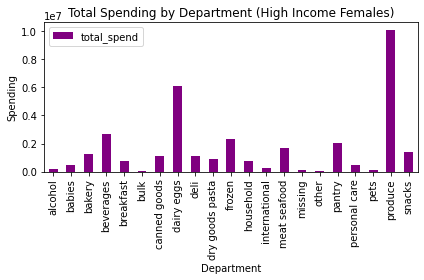

In [206]:
# plot for High Income Females spending by Dept
customer_dep_female_high_bar = customer_dep_female_high.groupby(['department']).agg({'total_spend': 'sum'}).plot.bar(color = 'purple')
plt.title('Total Spending by Department (High Income Females)')
plt.xlabel('Department')
plt.ylabel('Spending')
plt.tight_layout()

# Save charts

## Department Spending by customer profile charts

In [207]:
# creates path to 04 Analysis folder
path2 = r'/Users/oliviamurphy/Desktop/2022-01 Insta Cart Analysis/04 Analysis/Visualizations'

In [208]:
# saves bar chart for High Income Females Spending by Department
customer_dep_female_high_bar.figure.savefig(os.path.join(path2, 'customer_dep_female_high_bar.png'))

In [209]:
# saves bar chart for High Income Males Spending by Department
customer_dep_male_high_bar.figure.savefig(os.path.join(path2, 'customer_dep_male_high_bar.png'))

In [210]:
# saves bar chart for Middle Income Males Spending by Department
customer_dep_middle_male_bar.figure.savefig(os.path.join(path2, 'customer_dep_male_middle_bar.png'))

In [211]:
# saves bar chart for Middle Income Females Spending by Department
customer_dep_middle_female_bar.figure.savefig(os.path.join(path2, 'customer_dep_female_middle_bar.png'))

In [212]:
# saves bar chart for High Income Males Spending by Department
customer_dep_short_male_low_bar.figure.savefig(os.path.join(path2, 'customer_dep_short_male_low.png'))

In [213]:
# saves bar chart for High Income Females Spending by Department
customer_dep_short_female_low_bar.figure.savefig(os.path.join(path2, 'customer_dep_short_female_low.png'))

In [224]:
# saves bar chart for customer profile distributions
profile_distribution_bar.figure.savefig(os.path.join(path2, 'profile_distribution_bar.png'))

##  customer profile spending by region chart

In [218]:
# saves bar chart for customer profile spending by region chart
final_short_grouped_region_bar.figure.savefig(os.path.join(path2, 'customer_dep_short_grouped_region_bar.png'))

##  Average expenditure per trip by customer profile 

In [215]:
# saves bar chart for Average expenditure per trip by customer profile 
final_short_grouped_expenditure_bar.figure.savefig(os.path.join(path2, 'customer_dep_short_grouped_expenditure_bar.png'))

##  Average usage frequency by customer profile 

In [223]:
# saves bar chart for Average usage frequency by customer profile 
final_short_grouped_frequency_bar.figure.savefig(os.path.join(path2, 'customer_dep_short_grouped_frequency_bar.png'))

# What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?"
# use crosstab

In [30]:
orders_products_departments_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32433030 entries, 0 to 32433029
Data columns (total 35 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   product_id                     string  
 1   product_name                   object  
 2   aisle_id                       string  
 3   department_id                  string  
 4   prices                         float64 
 5   order_id                       string  
 6   user_id                        string  
 7   order_number                   int64   
 8   orders_day_of_week             int64   
 9   order_hour_of_day              int64   
 10  days_passed_since_last_order   float64 
 11  add_to_cart_order              int64   
 12  reordered                      int64   
 13  gender                         object  
 14  state                          object  
 15  age                            int64   
 16  date_joined                    object  
 17  number_of_dependants     

In [35]:
orders_products_departments_final.groupby(['profile', 'activity_flag']).agg({'activity_flag':'count'})

activity_flag
profile              activity_flag                      
High Income Female   low activity                 166959
                     normal/high activity        4079775
High Income Male     low activity                 177289
                     normal/high activity        4035123
Low Income Female    low activity                  67873
                     normal/high activity         952859
Low Income Male      low activity                  70157
                     normal/high activity         971744
Middle Income Female low activity                 477747
                     normal/high activity       10358748
Middle Income Male   low activity                 481463
                     normal/high activity       10593293